# EE5027 Assignment 1

## Part 1 a   
Generation of binary data.    
The data is generated and stored with the “Generate_data.py” file.   
Run the 'Generate_data.py" script. 

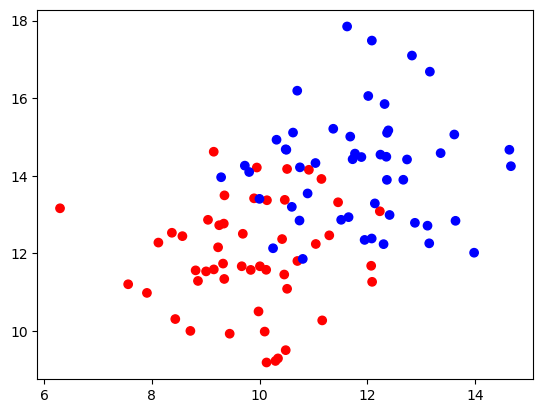

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io

N1 = 50
N2 = 50
K = 2
sigma = 2

# Set numpy random seed
np.random.seed(42)

mean1 = (10, 12)
cov1 = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean1, cov1, N1)
c1 = ['red'] * len(X1)

mean2 = (12, 14)
cov2 = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean2, cov2, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = []
for n in range(0, len(X)):
    if (n < len(X1)):
        T.append(0)
    else:
        T.append(1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color)
plt.show()

np.save('class1.npy', X1)
np.save('class2.npy', X2)
io.savemat('class1.mat', {'class1': X1})
io.savemat('class2.mat', {'class2': X2})

## Part 1 b
Implement a multi-layer perceptron (MLP) for classification.    
The MLP is a 2 layer MLP with only ONE hidden layer.    
Its structure should be 2 input neurons, 3 hidden layer neurons, and 1 output neuron (binary output).    
You may select the activation function for all the neurons (e.g., ReLU activation).    
Show your detailed implementation of the MLP.     
There are a total of 9 connections between the neurons.    
Initialize their weights randomly (e.g., follow a normal distribution), then plot the decision boundary of the initial MLP. 

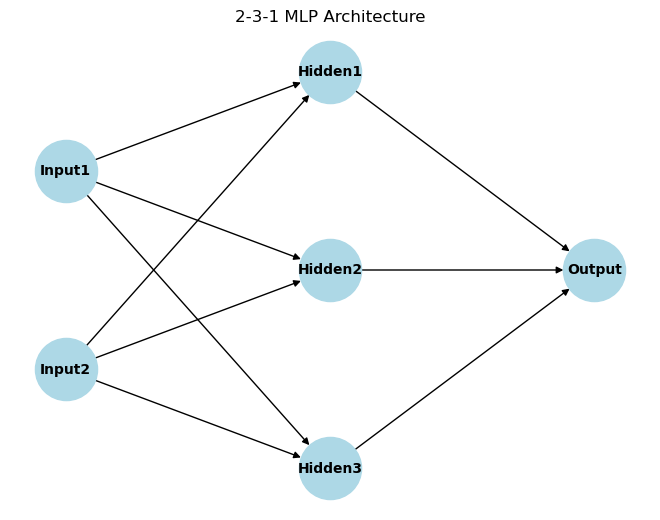

In [126]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_mlp():
    G = nx.DiGraph()
    
    # Adding input, hidden, and output nodes
    input_nodes = ['Input1', 'Input2']
    hidden_nodes = ['Hidden1', 'Hidden2', 'Hidden3']
    output_node = ['Output']

    # Adding edges between input and hidden layer
    for input_node in input_nodes:
        for hidden_node in hidden_nodes:
            G.add_edge(input_node, hidden_node)
    
    # Adding edges between hidden and output layer
    for hidden_node in hidden_nodes:
        G.add_edge(hidden_node, output_node[0])
    
    # Node positions for better visualization
    pos = {
        'Input1': (-2, 0.5), 'Input2': (-2, -0.5),
        'Hidden1': (0, 1), 'Hidden2': (0, 0), 'Hidden3': (0, -1),
        'Output': (2, 0)
    }
    
    # Drawing the network
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title('2-3-1 MLP Architecture')
    plt.show()

visualize_mlp()

The required network is a MLP with TWO layers.  
The weights $w$ will be a 3 by 2 matrix.  
The biases will be initialised at 0.   

In [127]:
# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x): # This activation function will be used
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x): # This will be used in backpropagation
    return sigmoid(x) * (1 - sigmoid(x))

The sigmoid activation function is the activation function chosen:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
This is chosen as the function gives binary output.   
The derivative of this function with respect to x is given by:   
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

The sigmoid activation for the hidden layer as it will result in a curved decision boundary, while ReLU will result in a linear decision boundary.  
The sigmoid function is also used at the output layer, as the task is binary classification. Sigmoid is the most suitable for activation function in this case, as it will output which class is of a higher probability. 

In [128]:
# Forward pass function
def forward(X, W1, b1, W2, b2):
    # Weight 1 dot with input layer and add bias 1
    Z1 = np.dot(X, W1) + b1
    # Pass the result through the activation function
    # Hidden layer 1
    A1 = sigmoid(Z1)
    # Pass the result through the second layer
    # Weight 2 dot with hidden layer 1 results and add bias 2
    Z2 = np.dot(A1, W2) + b2
    # Pass the result through the activation function
    # Output layer
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [129]:
# Initialize weights and biases
np.random.seed(42) # Add random seed for reproducibility
input_size = 2
hidden_size = 3
output_size = 1

# Initialize weights and biases randomly following a normal distribution
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(1, hidden_size)

W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(1, output_size)

# Load the data
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')
X = np.concatenate((X1, X2))
y = np.array([0] * len(X1) + [1] * len(X2)).reshape(-1, 1)

In [130]:
# Visualize the decision boundary with extended range
def plot_decision_boundary(X, W1, b1, W2, b2, range):
    # Increase the range for x and y axis
    x_min, x_max = X[:, 0].min() - range, X[:, 0].max() + range
    y_min, y_max = X[:, 1].min() - range, X[:, 1].max() + range 
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Forward pass on the grid
    _, _, _, A2_grid = forward(grid, W1, b1, W2, b2)
    A2_grid = A2_grid.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, A2_grid, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.6)
    plt.contour(xx, yy, A2_grid, levels=[0.5], colors='orange', linewidths=2)
    
    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=['red']*len(X1) + ['blue']*len(X2))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Decision Boundary')
    plt.show()

In [131]:
W1

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [132]:
b1

array([[ 1.57921282,  0.76743473, -0.46947439]])

In [133]:
W2

array([[ 0.54256004],
       [-0.46341769],
       [-0.46572975]])

In [134]:
b2

array([[0.24196227]])

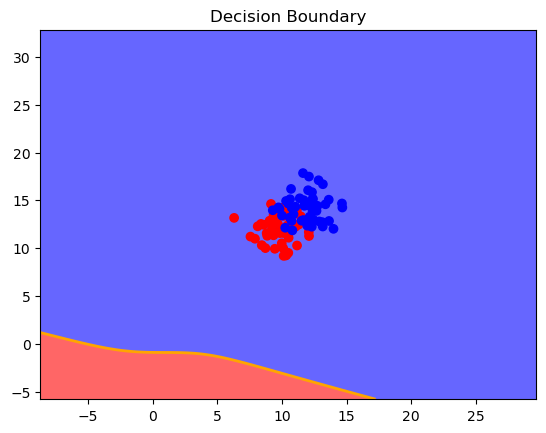

In [135]:
# Initial forward pass (before backpropagation)
Z1, A1, Z2, A2_initial = forward(X, W1, b1, W2, b2)
plot_decision_boundary(X, W1, b1, W2, b2, range=15)

$$
Accuracy = \frac{TP + TN}{TP+TN+FP+FN}
$$
Find the accuracy of the data.  

In [136]:
# Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    y_pred_class = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_pred_class == y_true) * 100
    return accuracy

In [137]:
accuracy = calculate_accuracy(y, A2_initial)
print(f'Prediction Accuracy: {accuracy:.2f}%')

Prediction Accuracy: 50.00%


This is because the model is simply classifying everything as class 2. Therfore, the accuracy of the model is 50%.  

## Part 1 c
Subsequently, we update the weights of the MLP connections (9 of them) with the Backpropagation algorithm, following the spirit of gradient descent.  
Implement the update from scratch and update the weights over ALL 100 data entries.  
You may select the cost/loss function you deemed suitable (e.g., squared error).  
Show your codes in detail.  
Then plot the new decision boundary as in Part 1b.  
Compare the two decision boundaries and discuss the differences and the effects of your implemented update.  
What is the classification accuracy with the updated MLP?  

In [138]:
# Backward pass (backpropagation)
def backward(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate):
    # Output layer error
    # Using MSE loss: The derivative of MSE loss with respect to A2 is approximately (A2 - y)
    # This gives the error signal for the output layer
    dZ2 = A2 - y

    # Gradient for weights between hidden layer (A1) and output layer (A2)
    # dW2 is the gradient for W2: the dot product of the hidden layer's activations (A1)
    # and the output error signal (dZ2), averaged over the number of samples (len(y))
    dW2 = np.dot(A1.T, dZ2) / len(y)

    # Gradient for the bias of the output layer (b2)
    # This is simply the sum of the error signal dZ2, averaged over the samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(y)
    
    # Hidden layer error
    # Propagate the output error back to the hidden layer
    # Multiply the output error (dZ2) by the transpose of W2 to get the error signal for A1
    dA1 = np.dot(dZ2, W2.T)

    # Apply the derivative of the activation function (sigmoid in this case) to the hidden layer
    # This is element-wise multiplication of dA1 by the derivative of sigmoid(Z1)
    dZ1 = dA1 * sigmoid_derivative(Z1)

    # Gradient for weights between the input layer (X) and the hidden layer (A1)
    # dW1 is the gradient for W1: the dot product of the input data (X)
    # and the hidden layer error signal (dZ1), averaged over the number of samples
    dW1 = np.dot(X.T, dZ1) / len(y)

    # Gradient for the bias of the hidden layer (b1)
    # This is the sum of the hidden layer error signal (dZ1), averaged over the samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(y)
    
    # Update weights and biases using gradient descent
    # Adjust W1 by subtracting the learning rate times the gradient (dW1)
    W1 -= learning_rate * dW1

    # Adjust b1 (hidden layer bias) by subtracting the learning rate times the gradient (db1)
    b1 -= learning_rate * db1

    # Adjust W2 by subtracting the learning rate times the gradient (dW2)
    W2 -= learning_rate * dW2

    # Adjust b2 (output layer bias) by subtracting the learning rate times the gradient (db2)
    b2 -= learning_rate * db2
    
    # Return the updated weights and biases
    return W1, b1, W2, b2


The loss function chosen is Mean Squared Error.   
Given by:  
$$
L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
This loss fucntion is choosen for the following reasons.   

Smoothness: The MSE loss function is differentiable, which is crucial for gradient-based optimization methods like backpropagation. The gradient of the MSE loss with respect to the model's parameters provides a clear signal to update the weights in a direction that reduces the error.  

Penalizes Large Errors: MSE penalizes large differences between the true and predicted values more than small ones (due to the squaring). This helps in reducing large deviations in the model’s predictions.

Direct Interpretation: The loss directly represents the average squared error, making it easy to understand and interpret how far off the predictions are from the true values.  

Symmetry: MSE is symmetric, meaning it treats overestimations and underestimations equally. Both types of errors are penalized in the same way, which is important in balanced binary classification problems.

In [139]:
# Loss function: Mean Squared Error
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

During backpropagation, we need the partial derivative of the loss function with respect to the output of the network (Denoted as A2 in my case).  
The derivative of MSE with respect to predicted value (A2) is:
$$
\frac{\partial L_{\text{MSE}}}{\partial \hat{y}_i} = \frac{2}{N} \left( \hat{y}_i - y_i \right)
$$
The fraction $/frac{2}{N}$ is a constant.  
To simplify things, I used the simplified version of the loss function, without the constant.  
Given by:
$$
\frac{\partial L_{\text{MSE}}}{\partial \hat{y}_i} \approx \hat{y}_i - y_i
$$
or in my case:
$$
\frac{\partial L_{\text{MSE}}}{\partial A2} \approx A2 - y_i
$$

In my case, I also did not convert the output layer result A2 into the 0 and 1 to compute the actual error. Backpropagation relies on the gradients of the loss function to update the weights.  
The sigmoid output (A2) provides a continuous value between 0 and 1, which allows the computation of meaningful gradients.  
If the output were converted to 0 or 1, this would create discontinuous values, making the gradient calculation impossible.    

In [140]:
# Initialize the hyperparameters
learning_rate = 0.01
epochs = 90000

# Update the weights and biases using backpropagation
# Training loop
for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
    
    # Compute loss
    # In order to simplfy things, loss is not remebered for early stopping
    loss = mse_loss(y, A2)
    
    # Backward pass and update weights
    W1, b1, W2, b2 = backward(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)
    
    # Print loss every 100 epochs
    if epoch % 10000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 0.25717707484695124
Epoch 10000, Loss: 0.22232014383826149
Epoch 20000, Loss: 0.15573623878227402
Epoch 30000, Loss: 0.10946679573478717
Epoch 40000, Loss: 0.0972213933685502
Epoch 50000, Loss: 0.09421064308385327
Epoch 60000, Loss: 0.0934967977557696
Epoch 70000, Loss: 0.09341804423303753
Epoch 80000, Loss: 0.0935131598372687


In [141]:
# Final forward pass (after backpropagation)
Z1, A1, Z2, A2_final = forward(X, W1, b1, W2, b2)

In [142]:
W1

array([[ 0.49671408, -0.45204446,  0.74500151],
       [ 1.52302978, -0.4356897 , -0.0897424 ]])

In [143]:
b1

array([[ 1.57921281, 10.40569573, -0.45661928]])

In [144]:
W2

array([[  2.17806554],
       [-11.59977095],
       [  1.24113778]])

In [145]:
b2

array([[1.87746776]])

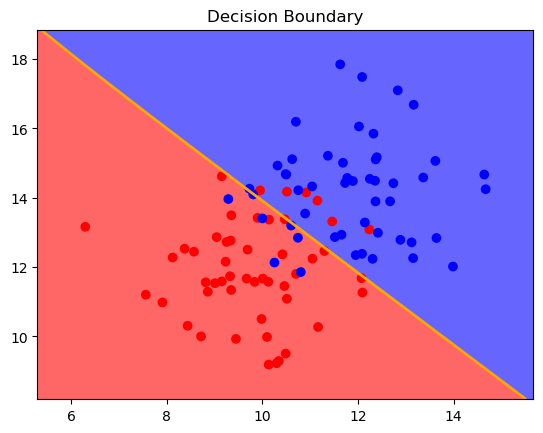

In [146]:
# Plot the updated decision boundary
plot_decision_boundary(X, W1, b1, W2, b2, 1)

In [147]:
# Find classificaiton accuracy after backpropagation
accuracy = calculate_accuracy(y, A2_final)
print(f'Prediction Accuracy: {accuracy:.2f}%')

Prediction Accuracy: 87.00%


Thew prediction accuracy is now much higher at 87%.   
This means that the decision boundary shifted.   
Which allowed more points to be correctly classified.  

## Part 1 c Discussion on decision boundaries  

First Decision Boundary (Before Backpropagation):  

The initial decision boundary is derived from the randomly initialized weights and biases. Since the weights are not yet tuned to the dataset, the decision boundary (or the decison hyper plane) is placed arbitrarily in the feature space.  
As a result, the model doesn’t differentiate between the two classes effectively. The boundary classifies all points into class 2 (ground truth 1). This occurs because the initial weights are not suited to separate the classes, leading the decision boundary to lump everything into one class.  
Since 50% of the data belongs to class 1, the model ends up with an accuracy of 50%, which is essentially random guessing for a binary classification problem.  

Second Decision Boundary (After Backpropagation):  

After training the model with backpropagation, the weights are adjusted to minimize the loss (Mean Squared Error). This means that the decision boundary (or the decision hyper plane) moves towards a position that better separates the two classes, based on the patterns the model learns from the data.    
The decision boundary now roughly splits class 1 from class 2. This is a significant improvement compared to the initial boundary, which classified everything as one class. The boundary is more aligned with the true distribution of the classes.  
With a better-aligned decision boundary, the prediction accuracy improves to 87%, indicating that the model is now correctly classifying most points in the dataset.  

Before training, the model performed poorly, classifying all points as class 2, resulting in a 50% accuracy, which is no better than random guessing.  
After training, the model improved its ability to differentiate between the two classes, with the decision boundary shifting to a more appropriate position, yielding a much higher accuracy (87%). Although the decison boundary or the decision hyper plane still can not perfectly split the 2 groups. This is also because the 2 groups are smeared with each other. 

# Part 2 - RBF

## Part 2 a
With the same set of data as in Part 1, now we leverage the RBF network for this part of classification task.  
Assume that the Gaussian function is used for the hidden layer neurons with the width set as 𝜎 = 1.  
Further, we set that there are 3 hidden neurons, and that the 3 RBF centers are randomly set.  
The randomly set RBF centers should be situated within the range of all the data.  
The RBF neural network also has only 1 single output neuron.  
Show your code that constructs this RBF network and show the plot that highlights the randomly chosen RBF center.  
Subsequently, code and determine the weights from the hidden layer to the output layer, using the LS estimation algorithm. 
Next, plot the decision boundary of this RBF network and determine the classification accuracy.  
Compare and discuss the performance of this RBF network compared to the updated MLP after Part 1c. 

In [148]:
# Gaussian radial basis function (RBF)
def gaussian_rbf(x, c, s):
    # Compute the Euclidean distance between each point in x and center c
    # `np.linalg.norm(x - c, axis=1)**2` computes the squared distance for each data point
    # `axis=1` ensures that the operation is applied row-wise (for each data point)
    # The squared Euclidean distance is divided by 2 * s^2 (Gaussian width parameter)
    # The final result is the Gaussian RBF activation for each point
    return np.exp(-np.linalg.norm(x - c, axis=1)**2 / (2 * s**2))

In [149]:
# Forward pass of the RBF network
def rbf_forward(X, centers, W, sigma):
    # Initialize the RBF activation matrix Phi with zeros
    # Shape: [number of data points (X.shape[0]), number of centers (len(centers))]
    # Each entry in Phi will store the RBF activation of a data point for a given center
    Phi = np.zeros((X.shape[0], len(centers)))

    # Loop over each RBF center
    for i, center in enumerate(centers):
        # For each center, compute the RBF activations for all data points in X
        # Gaussian RBF is applied to calculate the distance-based activation
        # `X` contains multiple data points, and `center` is a specific RBF center
        Phi[:, i] = gaussian_rbf(X, center, sigma)

    # After calculating all the RBF activations (Phi matrix),
    # compute the dot product of Phi and the weights W
    # The dot product combines the activations of the hidden layer (Phi)
    # with the output weights (W) to give the final output
    return np.dot(Phi, W)

In [150]:
# Initialize random centers within the range of the data
def initialize_centers(X, k):
    np.random.seed(42)
    
    # Find the minimum and maximum for each feature
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    
    # Randomly generate k centers within the data range
    centers_x = np.random.uniform(x_min, x_max, k)
    centers_y = np.random.uniform(y_min, y_max, k)
    
    # Combine the randomly selected x and y values to form centers
    centers = np.vstack((centers_x, centers_y)).T
    
    return centers

The least squares solution is given by:  
$$
W = (\Phi^T \Phi)^{-1} \Phi^T y
$$

In [151]:
# Function to manually calculate the Least Squares solution for W
def least_squares(Phi, y):
    # Step 1: Compute the transpose of the matrix Phi
    Phi_T = Phi.T
    
    # Step 2: Compute the product of Phi_T and Phi
    # This gives us a square matrix of shape [k, k], where k is the number of RBF centers
    Phi_T_Phi = np.dot(Phi_T, Phi)
    
    # Step 3: Compute the inverse of (Phi_T_Phi)
    # This is the core part of the least squares solution
    # We use np.linalg.inv() to compute the inverse
    Phi_T_Phi_inv = np.linalg.inv(Phi_T_Phi)
    
    # Step 4: Compute the product of the inverse and Phi_T
    Phi_T_Phi_inv_Phi_T = np.dot(Phi_T_Phi_inv, Phi_T)
    
    # Step 5: Finally, compute the weights W by multiplying the above result with y
    W = np.dot(Phi_T_Phi_inv_Phi_T, y)
    
    return W


In [152]:
# Construct RBF network with Gaussian functions and Least Squares estimation
def rbf_network(X, y, k, sigma):
    # Step 1: Randomly initialize RBF centers
    centers = initialize_centers(X, k)
    
    # Step 2: Create RBF matrix (hidden layer outputs)
    Phi = np.zeros((X.shape[0], k))
    for i in range(k):
        Phi[:, i] = gaussian_rbf(X, centers[i], sigma)
    
    # Step 3: Solve for weights using Least Squares (LS)
    W = least_squares(Phi, y)  # Least squares solution
    
    return centers, W

In [153]:
# Function to compute the RBF activation
def compute_rbf_activations(X, centers, sigma):
    # Compute the squared Euclidean distance between each data point and each center
    dists_sq = np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :]) ** 2, axis=2)
    # Compute the RBF activations
    activations = np.exp(-dists_sq / (2 * sigma ** 2))
    return activations

# Plot the decision boundary
def plot_decision_boundary(X, y, centers, W, sigma):
    # Set the mesh grid step size (h) to 0.01 for finer resolution
    h = 0.01
    grid_x_min, grid_x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    grid_y_min, grid_y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(grid_x_min, grid_x_max, h),
                         np.arange(grid_y_min, grid_y_max, h))
    
    # Flatten the grid points to pass through the RBF activations
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the RBF activations for the grid points
    # Shape: [num_grid_points, num_centers]
    H_grid = compute_rbf_activations(grid_points, centers, sigma)  
    
    # Compute the output for each grid point
    # Apply the weights to the activations
    grid_outputs = H_grid.dot(W)  
    # Reshape to match the grid shape
    grid_predictions = grid_outputs.reshape(xx.shape)  
    
    # Plot decision boundary and data points
    plt.figure(figsize=(12, 8))
    
    # Plot the decision boundary with contourf, threshold at 0.5
    plt.contourf(xx, yy, grid_predictions >= 0.5, alpha=0.3, levels=[-1, 0, 1], colors=['red', 'blue'])
    
    # Plot the original data points for Class 1 and Class 2
    plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
    plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 2')
    
    # Plot the RBF centers
    plt.scatter(centers[:, 0], centers[:, 1], color='green', marker='x', s=100, label='RBF Centers')
    
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('RBF Network Decision Boundary')
    plt.show()

In [154]:
# RBF Network parameters
sigma = 1
k = 3  # Number of RBF neurons

# Load your data (X1, X2)
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')
X = np.concatenate((X1, X2))
y = np.array([0] * len(X1) + [1] * len(X2))

# Train RBF Network
centers, W = rbf_network(X, y, k, sigma)

# Print the weights between the hidden layer and the output neuron
print("Weights between the hidden layer and the output neuron:")
print(W)

Weights between the hidden layer and the output neuron:
[0.93734021 4.29529532 0.54137962]


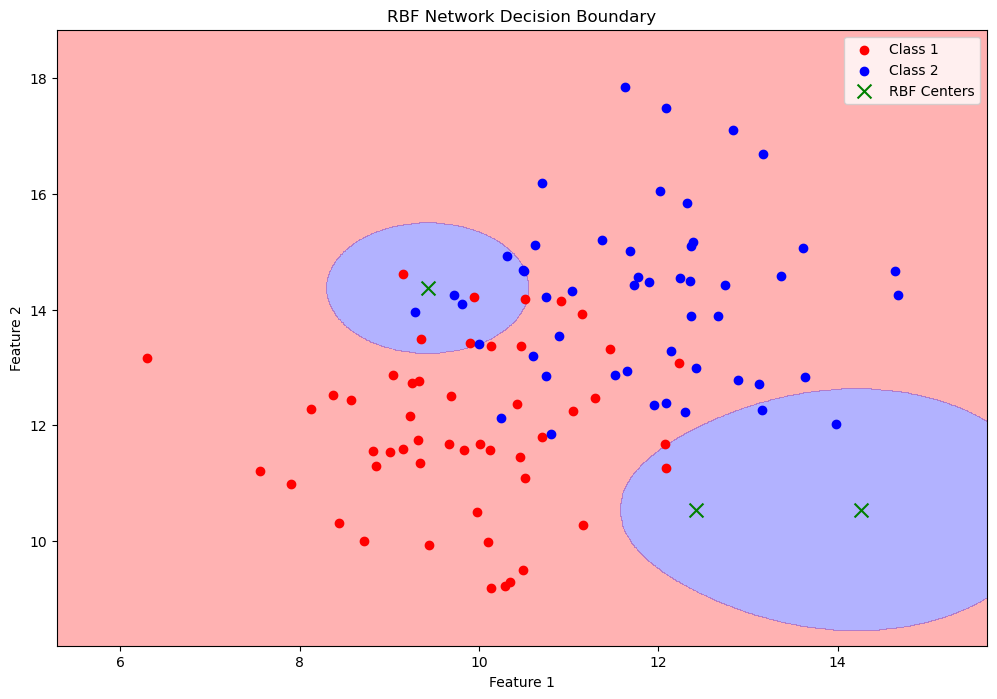

In [155]:
# Plot decision boundary and RBF centers
plot_decision_boundary(X, y, centers, W, sigma)

In [156]:
# Predict and calculate accuracy
y_pred = rbf_forward(X, centers, W, sigma)
accuracy = calculate_accuracy(y, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}%')

# Compare with MLP results
mlp_accuracy = 87  # Example value from MLP part
print(f'RBF Network Accuracy: {accuracy:.2f}%, MLP Accuracy: {mlp_accuracy:.2f}%')

Prediction Accuracy: 53.00%
RBF Network Accuracy: 53.00%, MLP Accuracy: 87.00%


Explanation:    
The Gaussian RBF is applied to each hidden neuron to transform the input data.    
The centers for the RBF neurons (RBF centers) are selected randomly from the data points.      
We then solve for the weights from the hidden layer to the output layer using Least Squares.   
Decision boundary was plotted and RBF centers are highlighted.   


Comparison with MLP:   
The RBF Network may perform better or worse depending on how well the centers represent the data.  
In this case, it performed poorly, as the centers are far from center of the data.  
The data is fairly complex in this case well, being a mixture of the 2 groups.   


RBF networks typically perform well with a small number of centers but may struggle if the data is complex, in which case more centers or hidden neurons might be needed.   
The MLP, after training, can learn more complex decision boundaries because of its ability to model non-linear patterns through multiple layers and the backpropagation algorithm.   

## Part 2 b
Repeat Part 2a, now with 6 RBF centers that are randomly set.   
The hidden neurons still leverage the Gaussian function with the same width of 𝜎 = 1.   
Determine the new weights between the hidden layer and the output neuron.   
Plot the decision boundary for this RBF network and determine the classification accuracy.   
Compare with the RBF network in Part 2a and discuss the effects of the numbers of hidden neuron on the performance of the RBF network.  

Weights between the hidden layer and the output neuron (6 centers):
[ 2.41816400e-02  2.37942717e+00  9.47214886e-01  7.28582901e-01
 -3.92488825e-02  1.31898688e+02]


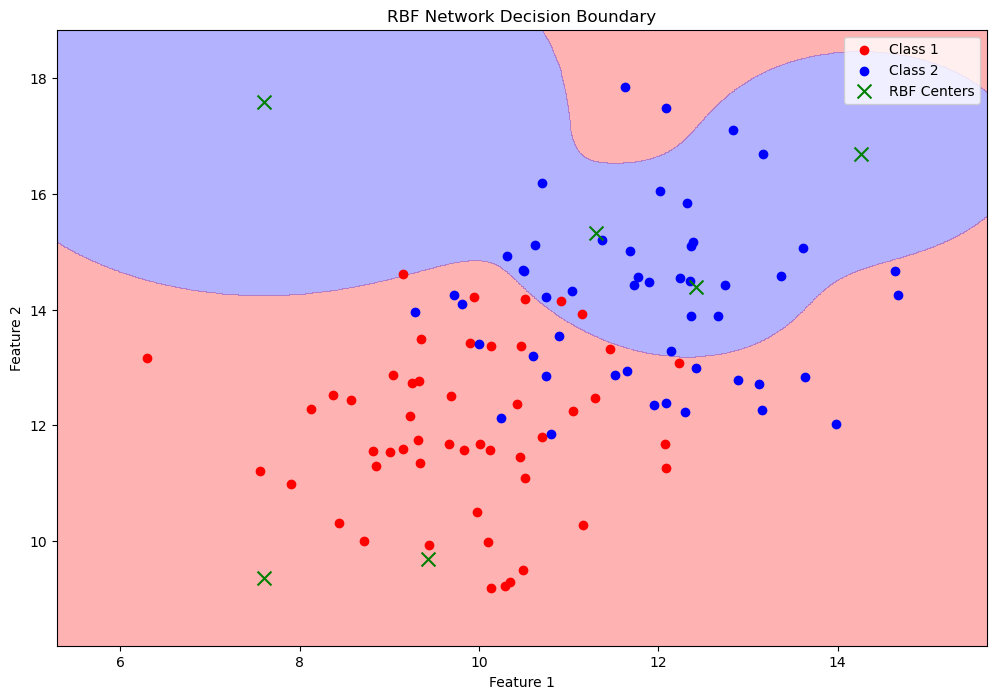

Prediction Accuracy with 6 RBF Centers: 73.00%


In [157]:
# RBF Network parameters
sigma = 1
k = 6  # Number of RBF neurons (increased from 3 to 6)

# Train RBF Network with 6 RBF centers
centers_6, W_6 = rbf_network(X, y, k, sigma)

# Print the weights for 6 RBF centers
print("Weights between the hidden layer and the output neuron (6 centers):")
print(W_6)

# Plot decision boundary for RBF network with 6 centers
plot_decision_boundary(X, y, centers_6, W_6, sigma)

# Predict and calculate accuracy for 6 RBF centers
y_pred_6 = rbf_forward(X, centers_6, W_6, sigma)
accuracy_6 = calculate_accuracy(y, y_pred_6)
print(f'Prediction Accuracy with 6 RBF Centers: {accuracy_6:.2f}%')


# Part 2 b - Discussion on number of RBF centers

The accuracy of 6 RBF centers improved to 73%, from a mere 53% of 3 RBF centers.

Adding more RBF centers generally makes the decision boundary more flexible, which can improve classification performance, especially on complex datasets.   
However, if the dataset is simple or small, too many hidden neurons can cause the model to overfit, reducing its ability to generalize to unseen data.

In Part 2a (3 centers), the decision boundary is relatively simple, and the model is unable to classify points correctly.   
With 6 centers, the model is better at handling more intricate patterns in the data, which can lead to better performance and higher accuracy.   
As can be seen from the graph, the decision boundary for 6 RBF centers is much more complex as compared to the 3 RBF centers.  
However, a complex decision boundary may not be a good thing anyways.   
This is because   
i) the data may overfit;   
ii) as seen in part 1 c, a simple decision boundary is enough at times. 
